In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as Rectangle
import random
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/Life_Expectancy_Data.csv')

In [3]:
df.head(100)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Argentina,2000,Developing,74.1,137.0,12,7.68,1349.025282,NaN,6,...,88.0,9.21,83.0,0.1,7669.273916,3757452.0,1.2,1.1,0.764,15.0
96,Armenia,2015,Developing,74.8,118.0,1,NaN,0.000000,94.0,33,...,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
97,Armenia,2014,Developing,74.6,12.0,1,3.91,295.608714,93.0,13,...,95.0,4.48,93.0,0.1,3994.712355,29622.0,2.1,2.1,0.739,12.7
98,Armenia,2013,Developing,74.4,123.0,1,3.79,279.429081,95.0,10,...,96.0,4.55,95.0,0.1,3843.591213,289359.0,2.1,2.1,0.736,12.7


### Grafica de expectativa de vida por pais. 
#### Se decide plotear cada uno individual por la cantidad de paises existentes dado que no queda visible en un solo grafico toda la info.

['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


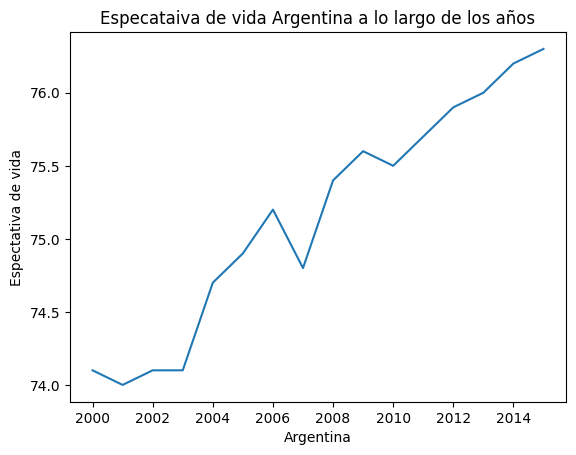

In [4]:
print(df.columns.tolist())

df_espectativa = df[["Country","Year", 'Life expectancy ']].copy()

## Imprime todas las grafiacas de todos los paises, mucho tiempo de procesamiento y baja calidad de visualizacion
#paises = copia_df.groupby("Country")

#for i, (name,group) in enumerate(paises):
#  group.plot(x="Year",y="Life expectancy ", xlabel = name, ylabel='Life Expectancy')

df_espectativa= df_espectativa[(df_espectativa['Country']== 'Argentina')]

plt.plot("Year","Life expectancy ",data = df_espectativa)

plt.xlabel('Argentina')
plt.ylabel('Espectativa de vida')
plt.title('Especataiva de vida Argentina a lo largo de los años')
#plt.legend()
plt.show()

## Mortandad de diferentes enfermedades 

##### La idea es poder ver graficamente como estan los indicadores estadisticos principales para cada enfermedad en todos los paises y a lo largo de los años de los que se tienen datos.

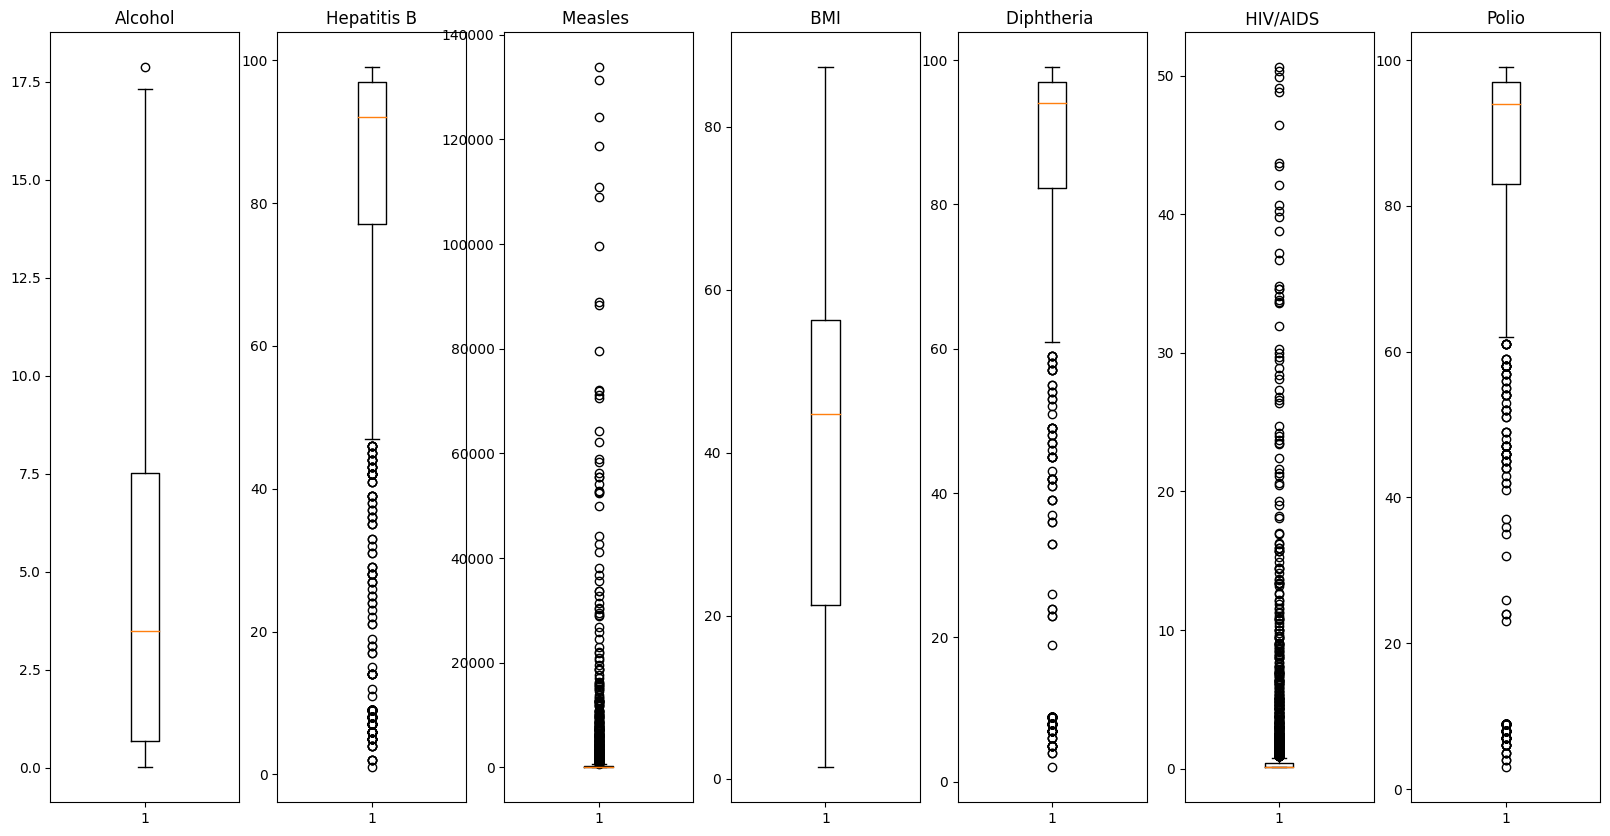

In [5]:

df_mortandad = df[['Alcohol', 'Hepatitis B','Measles ', ' BMI ', 'Diphtheria ',' HIV/AIDS', 'Polio']].copy()
df_mortandad.head(100)
df_mortandad = df_mortandad.dropna()

fig, axs = plt.subplots(1,7,figsize=(20, 10))

keys=df_mortandad.columns.tolist()
len(df_mortandad.columns)

for i in ( range(len(df_mortandad.columns))):
    axs[i].boxplot(df_mortandad[df_mortandad.columns[i]])
    axs[i].set_title(df_mortandad.columns[i])
plt.show()



# Evolucion de la hepatitis B a lo largo de los años en el mundo


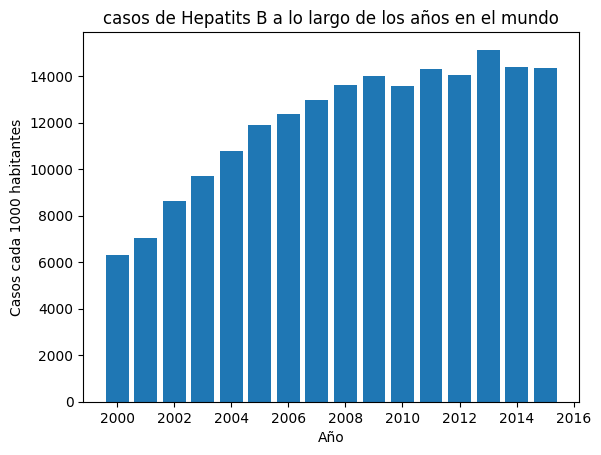

In [6]:
df_hepatitis = df[['Year','Hepatitis B']].copy()

anios = df_hepatitis.groupby(df_hepatitis["Year"])["Hepatitis B"].sum()

plt.bar(anios.index,anios.values)

plt.xlabel('Año')

plt.ylabel('Casos cada 1000 habitantes')

plt.title('casos de Hepatits B a lo largo de los años en el mundo')

plt.show()

## Grafica de Mortalidad adulta para Argentina, Suecia y Tunez , periodo 2000-2015. Valores cada 1000 habitantes

#### barplot


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'mortalidad'),
 Text(0.5, 1.0, 'Mortalidad adulta x anio')]

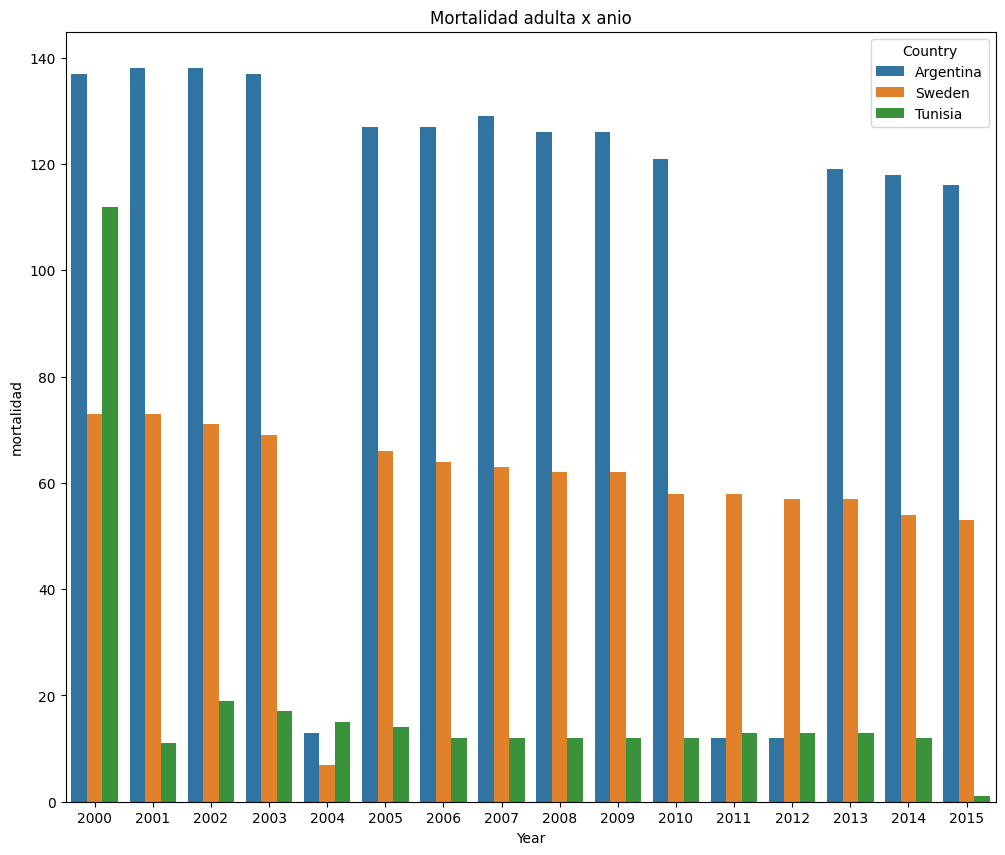

In [7]:
df_mortalidad = df[['Country','Year','Adult Mortality']].copy()

df_mortalidad = df_mortalidad[(df_mortalidad['Country']== 'Argentina') | (df_mortalidad['Country']== 'Sweden') | (df_mortalidad['Country']== 'Tunisia')]

df_mortalidad.head(100)

plt.figure(figsize=(12,10))

ax= sns.barplot(data =df_mortalidad, x='Year',y ='Adult Mortality',  hue= 'Country',fill= True,)

ax.set(xlabel = 'Year', ylabel = 'mortalidad', title = 'Mortalidad adulta x anio')



## Grafica de Porcentaje total de PBI invertido en salud respecto a la cantidad de poblacion de cada pais

#### Scatterplot

[Text(0.5, 0, 'Gasto total en salud %PBI'),
 Text(0, 0.5, 'PBI'),
 Text(0.5, 1.0, 'Gasto total en salud de Argentina, Suecia, y Tunez')]

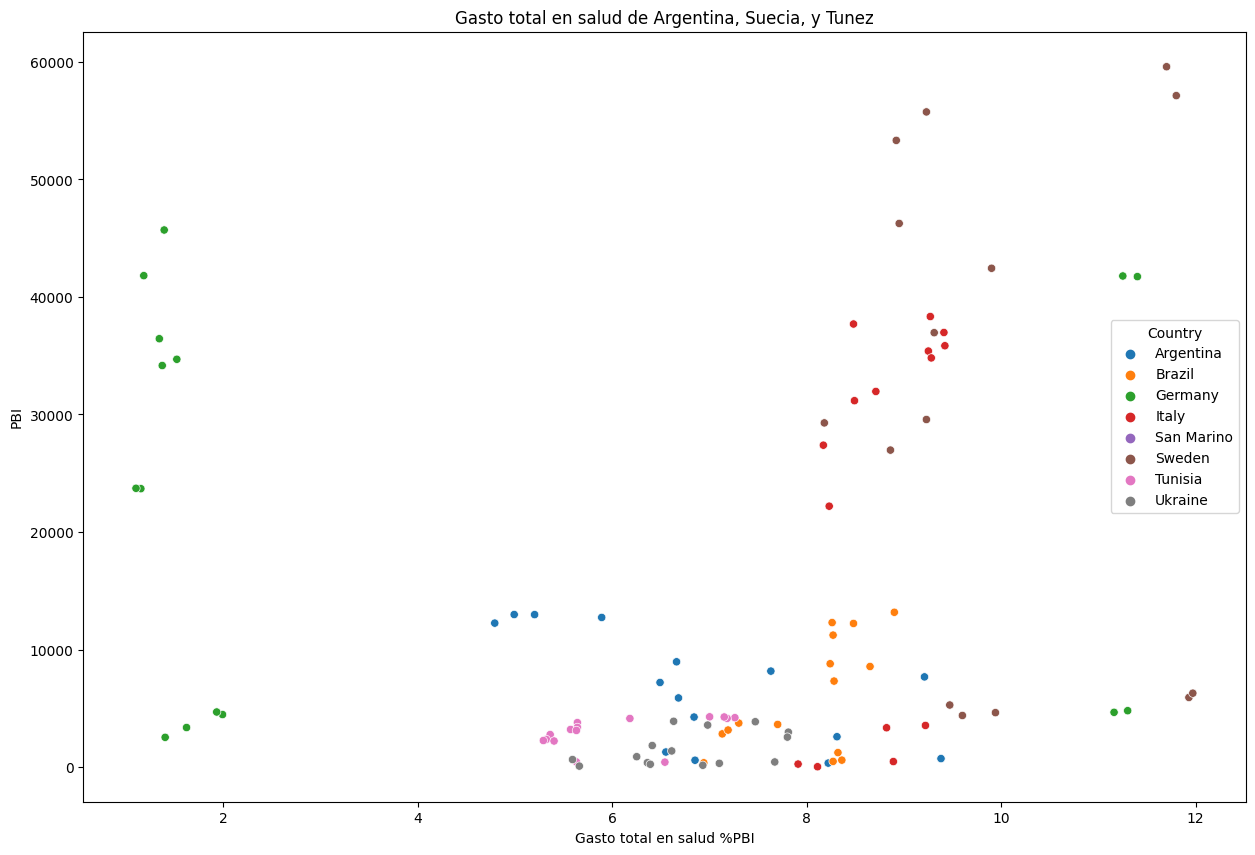

In [8]:
df_mortalidad = df[['Country', 'GDP','Total expenditure']].copy()

df_mortalidad = df_mortalidad[(df_mortalidad['Country']== 'Argentina') | (df_mortalidad['Country']== 'Sweden') | (df_mortalidad['Country']== 'Tunisia')| (df_mortalidad['Country']== 'Italy')| (df_mortalidad['Country']== 'Brazil')
                              | (df_mortalidad['Country']== 'San Marino')| (df_mortalidad['Country']== 'Ukraine')| (df_mortalidad['Country']== 'Germany')]

plt.figure(figsize=(15,10))

ax= sns.scatterplot(data =df_mortalidad, x='Total expenditure', y ='GDP',  hue= 'Country')

ax.set(xlabel = 'Gasto total en salud %PBI', ylabel = 'PBI', title = 'Gasto total en salud de Argentina, Suecia, y Tunez')



# Relacion años de escolaridad vs indice de desarollo humano

### kdeplot


[Text(0.5, 0, 'índice de Desarrollo Humano'),
 Text(0, 0.5, 'densidad de escolarizacion'),
 Text(0.5, 1.0, 'Relación de escolaridad con indice de desarrollo humano')]

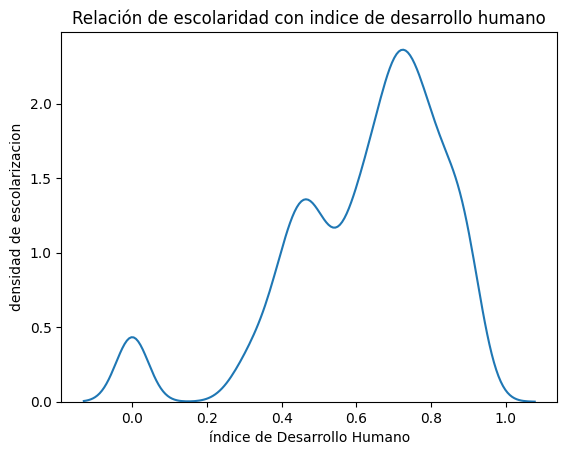

Bad pipe message: %s [b'L8\xfc\x80^\x8f/\x16!\xc4\xf1\xba\x99\xde\xfe`\xb2\xad \xa1\xa1y\xa3T\xe5\x03\x0c\xc5^8)1\xc9:,\xab\xc74\xceS\xbfi\x1c\x99o\xbft\x06\x8e\xfc\xdb\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05', b'\x03\x08']
Bad pipe message: %s [b'\x08\x08\t\x08\n\x08']
Bad pipe message: %s [b'\x04\x08\x05\x08\x06\x04\x01\x05\x01\x06']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'\x03\x02\x03\x04\x00-\x00\x02\x01\x01\x003\x00&\x00$\x00\x1d\x00 P[)Y\x03j\xa7\x0c\xee^\xa3> \x0c\xec\xab`\x84\xa4\x19\x1b\x97']
Bad pipe message: %s [b'E\x9d\x8b\xf3+uu\xe2\xd9\x94\xc7\x8a\xa4\xff\xcc\xa4\xa8\xa9 \xf8\xe9\x89\x9dL\x02\x91q+AX\x18\x1c\xeb\xdd\x1e8-:#0\x9eM\r\x087\x03K^v\xd9\x1f\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x

In [9]:
df_mortalidad = df[['Income composition of resources', 'Schooling']].copy()
plt.figure()
ax= sns.kdeplot(data =df_mortalidad['Schooling'], x =df_mortalidad['Income composition of resources'] )
ax.set(xlabel = 'índice de Desarrollo Humano', ylabel = 'densidad de escolarizacion', title = 'Relación de escolaridad con indice de desarrollo humano')